# Diagrams Example

examples from https://archives.haskell.org/projects.haskell.org/diagrams/gallery.html

In [7]:
:e FlexibleContexts
:e TypeFamilies

import Diagrams.Backend.Cairo.CmdLine
import Diagrams.Prelude
import Diagrams.TwoD.Layout.Grid
import IHaskell.Display.Diagrams

### Heighway Dragons

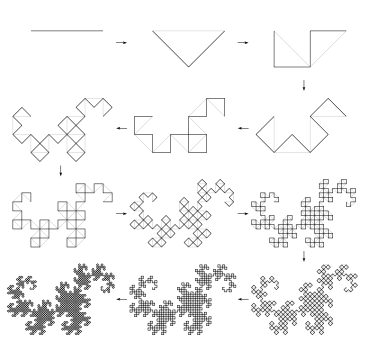

In [9]:
nextDragon trail = (trail # rotateBy (-1/8) 
                    <> trail # rotateBy (5/8) # reverseTrail) 
                   # scale (1/sqrt 2)
                   
dragonCurves = map (trailLike . (`at` origin)) (iterate nextDragon initialTrail)
  where
    initialTrail = hrule 1

withPrevious diagrams = zipWith (<>) diagrams (mempty : diagrams # opacity 0.2)

rememberOrder :: [Diagram B] -> [Diagram B]
rememberOrder = zipWith named [0::Int ..]

showOrder :: Diagram B -> Diagram B
showOrder diagram 
  = diagram # applyAll (map addArrow [0 .. length (names diagram)])
  where
    addArrow n = connectOutside' opts n (n + 1)
    opts = with & gaps .~ normalized 0.005 
                & headLength .~ tiny
                
example = dragonCurves # withPrevious 
                       # take 12
                       # sameBoundingRect
                       # rememberOrder 
                       # map (frame 0.1) 
                       # gridSnake
                       # showOrder 
                       # lw ultraThin           
example

## Vector Field

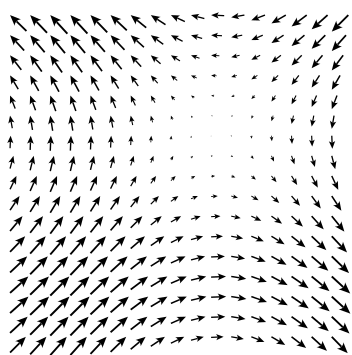

In [17]:
locs   = [(x, y) | x <- [0.1, 0.3 .. 3.25], y <- [0.1, 0.3 .. 3.25]]
points = map p2 locs

vectorField (x, y) = r2 (sin (y + 1), sin (x + 1))

arrows = map arrowAtPoint locs
 
arrowAtPoint (x, y) = arrowAt' opts (p2 (x, y)) (sL *^ vf) # alignTL
  where
    vf   = vectorField (x, y)
    m    = norm $ vectorField (x, y)

-- Head size is a function of the length of the vector
-- as are tail size and shaft length.
    hs   = 0.02 * m
    sW   = 0.004 * m
    sL   = 0.05 + 0.1 * m
    opts = (with & arrowHead  .~ spike
                 & headLength .~ normalized hs
                 & shaftStyle %~ lwN sW)

field   = position $ zip points arrows

example :: Diagram B
example = ( field # translateY 0.05 <> ( square 3.5 # lw none # alignBL))
example